# Util

In [1]:
import time
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from JSAnimation import IPython_display
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
%matplotlib inline

Normalizer class

In [2]:
class nzr(object):
    def __init__(self,_rawdata,_eps=1e-8):
        self.rawdata = _rawdata
        self.eps     = _eps
        self.mu      = np.mean(self.rawdata,axis=0)
        self.std     = np.std(self.rawdata,axis=0)
        """ GET NORMALIZED VAL """
        self.nzd_data = self.get_nzdval(self.rawdata)
        """ GET  ORIGIANL VAL """
        self.org_data = self.get_orgval(self.nzd_data)
        """ CHECK ERROR """
        self.maxerr = np.max(self.rawdata-self.org_data)
    def get_nzdval(self,_data):
        _n = _data.shape[0]
        _nzddata = (_data - np.tile(self.mu,(_n,1))) / np.tile(self.std+self.eps,(_n,1))
        return _nzddata
    def get_orgval(self,_data):
        _n = _data.shape[0]
        _orgdata = _data*np.tile(self.std+self.eps,(_n,1))+np.tile(self.mu,(_n,1))
        return _orgdata

Plot related 

In [3]:
def animate_frames(_frames,_figsize=(5,5),_title=''):
    fig = plt.figure(figsize=_figsize)
    hImg = plt.imshow(_frames[0],interpolation='none')
    if len(_frames[0].shape) == 2:
        plt.colorbar()
        plt.clim(np.min(_frames),np.max(_frames))
    nFrame = len(_frames)
    hTitle = plt.title('[%d/%d]%s'%(1,nFrame,_title))
    def init():
        hImg.set_data(_frames[0])
        return hImg,
    def animate(i):
        hTitle.set_text('[%d/%d] %s'%(i+1,nFrame,_title))
        hImg.set_data(_frames[i])
        return hImg,
    anim = animation.FuncAnimation(fig,animate,init_func=init,
                            frames=nFrame,interval=100, blit=True)
    display(display_animation(anim, default_mode='loop'))

Check 'animate_frames'


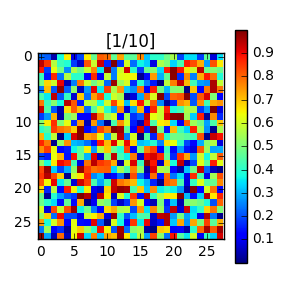
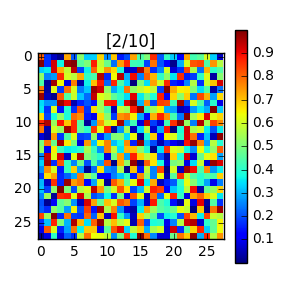
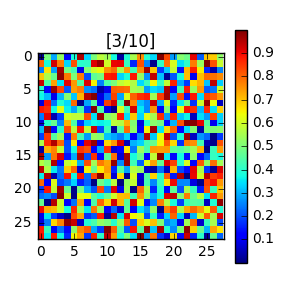
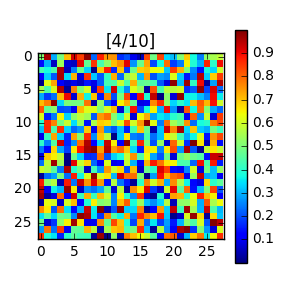
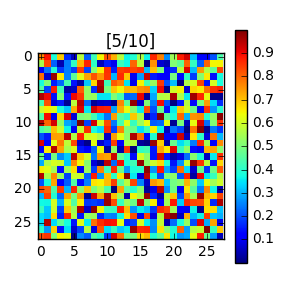
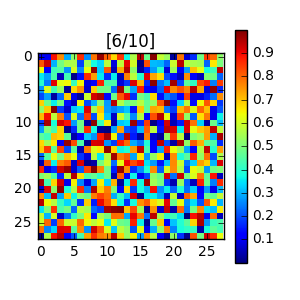
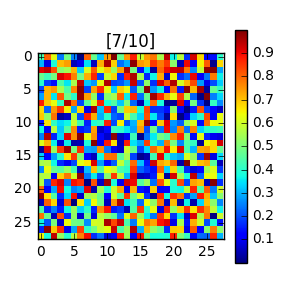
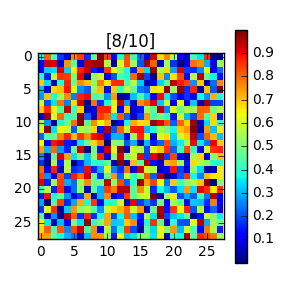
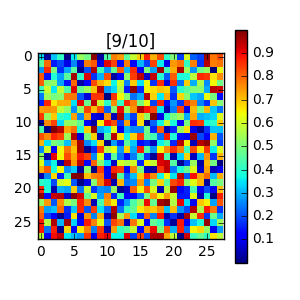
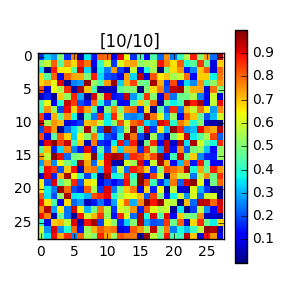

In [4]:
if __name__ == "__main__":
    frames = []
    for i in range(10):
        frames.append(np.random.rand(28,28))
    animate_frames(_frames=frames,_figsize=(3,3))

Tensorflow related

In [5]:
def gpusession():
    config = tf.ConfigProto(); 
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)
    return sess